PHYS 411
<h1><center>Assignment 1</center></h1>


Import required packages:

In [1]:
from sys import executable
print(executable)

/Users/Kev/anaconda3/bin/python


In [7]:
import random
import numpy as np
import scipy as sci
import pandas as pd
import seaborn as sb
from scipy.stats import norm
import matplotlib.pyplot as plt 
from IPython.display import Math, display

## Question 2: Monte Carlo simulation of the Central Limit theorem

###  Generate Data:

In [5]:
mean = 0.5
datanumber = 10000
n_bins = 50

# Generate an array A1
# Then subtract 0.5 from all the values
A0 = np.random.rand(datanumber)
A1 = np.random.rand(datanumber) - 0.5
A2 = A0 + A1 - 0.5

# Doing it 4, 8, and 16 more times: 
n4 = [4, 8, 16] 

A3 = A1
for i in range(0, n4[0]): 
    T1 = np.random.rand(datanumber)
    A3 = A3 + T1 - 0.5

A4 = A1
for j in range(0, n4[1]): 
    T2 = np.random.rand(datanumber)
    A4 = A4 + T2 - 0.5
    
A5 = A1
for k in range(0, n4[2]): 
    T3 = np.random.rand(datanumber)
    A5 = A5 + T3 - 0.5

### Plot Data:

Text(0.5,1,'Monte Carlo 16')

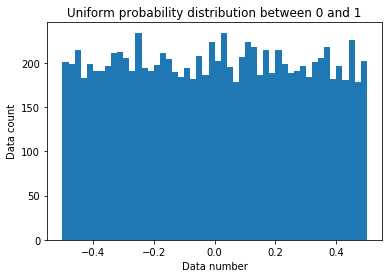

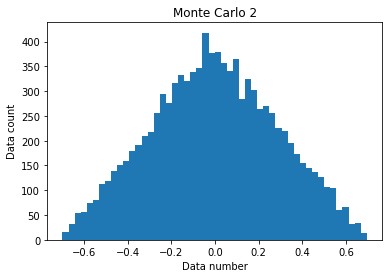

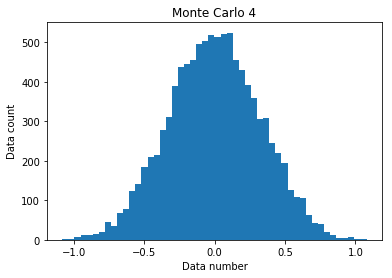

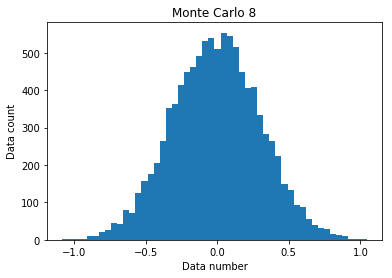

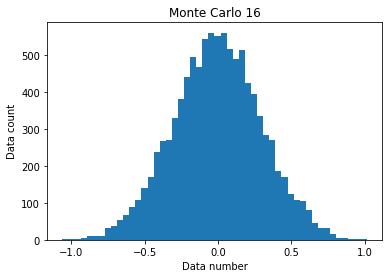

In [6]:
plt.figure(1)
plt.hist(A1, bins=n_bins)
plt.xlabel(r'Data number')
plt.ylabel(r'Data count')
plt.title(r'Uniform probability distribution between 0 and 1')

plt.figure(2)
plt.hist(A2/np.sqrt(2), bins=n_bins)
plt.xlabel(r'Data number')
plt.ylabel(r'Data count')
plt.title(r'Monte Carlo 2')

plt.figure(3)
plt.hist(A3/np.sqrt(n4[0]), bins=n_bins)
plt.xlabel(r'Data number')
plt.ylabel(r'Data count')
plt.title(r'Monte Carlo 4')

plt.figure(4)
plt.hist(A4/np.sqrt(n4[1]), bins=n_bins)
plt.xlabel(r'Data number')
plt.ylabel(r'Data count')
plt.title(r'Monte Carlo 8')

plt.figure(5)
plt.hist(A5/np.sqrt(n4[2]), bins=n_bins)
plt.xlabel(r'Data number')
plt.ylabel(r'Data count')
plt.title(r'Monte Carlo 16')

As we can see, the graphs approach a Gaussian as the sample count increases. 
This is a result of probability. Data in this graph is generated in a range from 0 to 1, then the values are counted and plotted on a histogram. A second set of data is generated and added to the original set, this process is repeated multiple times. The histogram will approach a Gaussian because it is unlikely for a value in the data set to be repeatedly assigned an extreme value at one end of the spectrum, hence, decreasing the data count at the extremes with each successive data set. Values from the repeated addition of data sets will tend to average towards the expected value, therefore, data counts close to the expected value will increase. Thus, the data will tend towards the normal distribution (a Gaussian) as the sample size increases. 

## Question 3: Flipping two coins 

In [15]:
t = 60*60  # Total flipping time
p = 3      # Period between flips  

# Generate coin flips 
B0 = np.random.randint(1, 3, int(t/p)+2)
B1 = []

# Add the coin values
for n in range(0, len(B0)-1):
    b = B0[n] + B0[n+1]
    B1.append(b)

print(B1[:10])

[2, 2, 3, 3, 3, 3, 2, 3, 3, 2]


### a) Possible outcome of x(t) for the first 30s:

[2, 2, 3, 3, 3, 3, 2, 3, 3, 2]


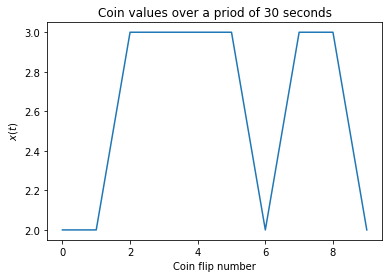

In [16]:
plt.figure(6)
plt.plot(B1[:10])
plt.xlabel(r'Coin flip number')
plt.ylabel(r'$x(t)$')
plt.title(r'Coin values over a priod of 30 seconds')
print(B1[:10])

### b) A likely histogram of x(t)

Text(0.5,1,'Histogram of the summed value of two coins ($x(t)$)')

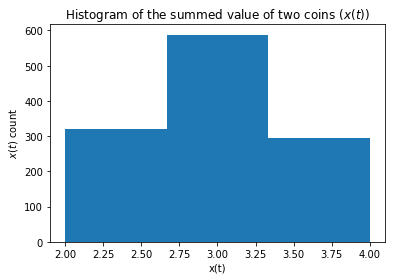

In [17]:
plt.figure(7)
plt.hist(B1, bins=3)
plt.xlabel(r'x(t)')
plt.ylabel(r'$x(t)$ count')
plt.title(r'Histogram of the summed value of two coins ($x(t)$)')

### c) Probability density function $p(x)$, and probability distribution function $P(x)$

<b>Probability density function</b>: $p(x)$

$p(x) 
= \frac{1}{4}\delta(x-2) + \frac{1}{2}\delta(x-3) + \frac{1}{4}\delta(x-4)
$

<b>Probability distribution function</b>: $P(x)$

$P(x) = $
$
\begin{cases} 
  \frac{1}{4} & x < 2 \\
  \frac{3}{4} & 2 \leq x < 3 \\
  1 & x \geq 3
\end{cases}
$ 

Text(0.5,1,'Probability distribution function of x(t) values')

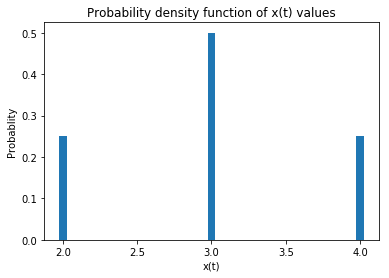

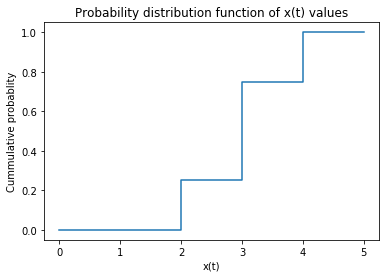

In [18]:
rang = [2, 3, 4]
RANG = [0, 2, 3, 4, 5]
pdf = [0.25, 0.5, 0.25]
PDF = [0, 0, 0.25, 0.75, 1]

# Plot the probability density function 
plt.figure(8)
plt.bar(rang, pdf, width=0.05)
plt.xlabel(r'x(t)')
plt.ylabel(r'Probablity')
plt.title(r'Probability density function of x(t) values')

# Plot the probability distribution function
plt.figure(9)
plt.step(RANG, PDF)
plt.xlabel(r'x(t)')
plt.ylabel(r'Cummulative probablity')
plt.title(r'Probability distribution function of x(t) values')

### d) The mean $\mu_x$ of $x(t)$, and the variance $\sigma_x^2$ of $x(t)$

In [19]:
# Find the mean 
mean = round(np.mean(B1), 1)
display(Math(r'\mu_{x}=%.2f' % mean))

# Find the varience 
var = round(np.var(B1), 1) 
display(Math(r'\sigma_{x}^{2}=%.2f' % var))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Question 4: Comparison of minute-resolution and hourly-resolution data

In [20]:
# Load the data
D1 = np.loadtxt('/Users/Kev/Documents/Uvic/Python/PHYS 411 - Time Series Analysis/Data Sets/UVicSci_temperature.dat', dtype=float)
D2 = np.loadtxt('/Users/Kev/Documents/Uvic/Python/PHYS 411 - Time Series Analysis/Data Sets/AllStations_temperature_h_2017.dat', dtype=float)

# Check data dimensions 
print(D1.shape, type(D1))
print(D2.shape, type(D2))

(2979363,) <class 'numpy.ndarray'>
(84723, 38) <class 'numpy.ndarray'>


### 1) 

#### Generate graphs: 

In [5]:
date1 = ['2013', '2014', '2015', '2016', '2017', '2018']
date2 = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

ypos1 = np.array([0, 1, 2, 3, 4, 5])*len(D1[3:])/6 + len(D1[3:])/24
ypos2 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])*((D2[84722:,0]-D2[3,0])[0]/9)+D2[3,0]+(D2[84722:,0]-D2[3,0])[0]/18

Text(0.5,1,'Hour resolution data from 2010 to 2018')

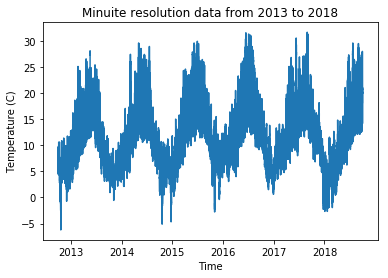

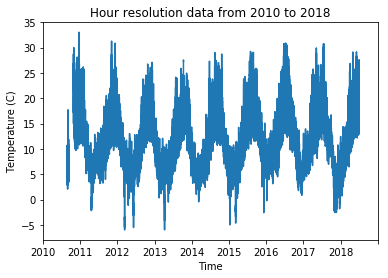

In [6]:
# Temprature 
plt.figure(10)
plt.plot(D1[3:])
plt.xlabel(r'Time')
plt.ylabel(r'Temperature (C)')
plt.xticks(ypos1, date1)
plt.title(r'Minuite resolution data from 2013 to 2018')

# Temperature all stataions
# UVic Science Building
# Longitude: 236.691
# Latitude: 48.462
# Column: 36 => Index: 25
plt.figure(11)
plt.plot(D2[3:,0],D2[3:,35])
plt.xlabel(r'Time')
plt.ylabel(r'Temperature (C)')
plt.xticks(ypos2, date2)
plt.title(r'Hour resolution data from 2010 to 2018')

#### Calculate averages and standard deviation:  

In [9]:
# Find the mean 
d1 = D1[3:]
d2 = D2[3:,35]

MnM1 = np.nanmean(d1)
display(Math(r'\mu_{M}=%.5f' % MnM1))

HrM1 = np.nanmean(d2)
display(Math(r'\mu_{H}=%.5f' % HrM1))

# Find the Standard Deviation 
MnV1 = np.nanvar(d1)
display(Math(r'\sigma_{M}=%.5f' % MnV1**0.5))

HrV1 = np.nanvar(d2) 
display(Math(r'\sigma_{H}=%.5f' % HrV1**0.5))

# Find the relationships 
PDM = (MnM1-HrM1)/(HrM1) * 100
print(r'Percentage difference between mean values:', PDM, r'%')

PDV = (MnV1**0.5-HrV1**0.5)/(HrV1**0.5) * 100
print(r'Percentage difference between standard deviation values:', PDV, r'%')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Percentage difference between mean values: 0.8746927720071789 %
Percentage difference between standard deviation values: 1.4170850962461705 %


The average temperature for the minute resolution data is $\mu_M = 11.29530^\circ C$, with a standard deviation of $\sigma_M = 5.60895^\circ C$. 

The average temperature for the hourly resolution data is $\mu_H = 11.19736^\circ C$, with a standard deviation of $\sigma_H = 5.53058^\circ C$. 

Average temperature of the minute resolution data is $0.87469 \%$ higher than the hourly resolution data, while displaying a $1.41709 \%$ higher resolution. 

#### Generate histograms: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)


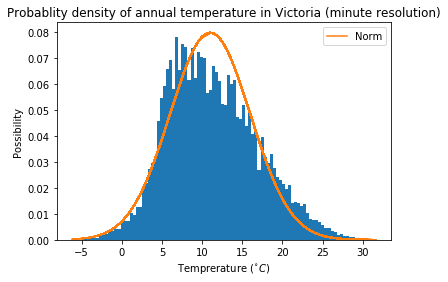

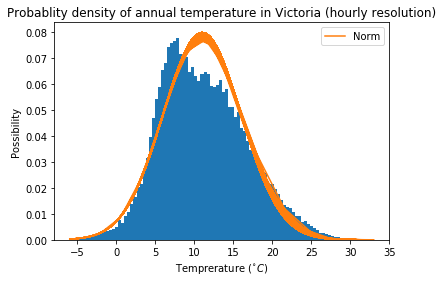

In [13]:
# Generate the histograms, probability density functions, and normal distributions
# Mn_pdf = sci.stats.norm.pdf(d1, int(MnM1), int(MnV1**0.5))
# Hr_pdf = sci.stats.norm.pdf(d2, int(HrM1), int(HrV1**0.5))
Mn_norm = norm.pdf(d1, int(MnM1), int(MnV1**0.5))
Hr_norm = norm.pdf(d2, int(HrM1), int(HrV1**0.5))

plt.figure(12)
plt.hist(d1[~np.isnan(d1)], bins=100, density=1)
# plt.plot(d1, Mn_pdf, label='PDF')
plt.plot(d1, Mn_norm, label='Norm')
plt.xlabel(r'Temprerature ($^{\circ} C$)')
plt.ylabel(r'Possibility')
plt.title(r'Probablity density of annual temperature in Victoria (minute resolution)')
plt.legend()

plt.figure(13)
plt.hist(d2[~np.isnan(d2)], bins=100, density=1)
# plt.plot(d2, Hr_pdf, label='PDF')
plt.plot(d2, Hr_norm, label='Norm')
plt.xlabel(r'Temprerature ($^{\circ} C$)')
plt.ylabel(r'Possibility')
plt.title(r'Probablity density of annual temperature in Victoria (hourly resolution)')
plt.legend()

### 2)  Data from 2012

In [33]:
start = int(len(D2)*3/16 + 3 + len(D2)/72)
fin = int(len(D2)*5/16 + 3 + len(D2)/72)

D3 = D2[start:fin, 35]

#### Calculate average and standard deviation: 

In [34]:
# Find the mean 
HrM2 = np.nanmean(D3)
display(Math(r'\mu_{H2012}=%.5f' % HrM2))

# Find the Standard Deviation 
HrV2 = np.nanvar(D3)
display(Math(r'\sigma_{M2012}=%.5f' % HrV2**0.5))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The average temperature for the minute resolution data is $\mu_M = 9.85886^\circ C$, with a standard deviation of $\sigma_M = 5.07574^\circ C$. 

#### Generate histogram: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)


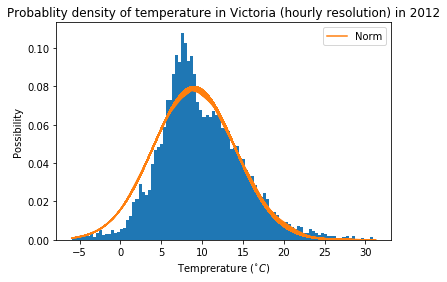

In [35]:
Hr2_norm = norm.pdf(D3, int(HrM2), int(HrV2**0.5))

plt.figure(15)
plt.hist(D3[~np.isnan(D3)], bins=100, density=1)
# plt.plot(d1, Mn_pdf, label='PDF')
plt.plot(D3, Hr2_norm, label='Norm')
plt.xlabel(r'Temprerature ($^{\circ} C$)')
plt.ylabel(r'Possibility')
plt.title(r'Probablity density of temperature in Victoria (hourly resolution) in 2012')
plt.legend()

### Discussion:

From the three probability density graphs, we can see the temperature in Victoria tends toward being cold, as the probability distribution displayed more weight towards the right side of the normal distribution. Average temperature in 2012 was colder than usual, with an average of $9.85886^\circ C$ compared to the averages of $11.29530^\circ C$ and $11.19736^\circ C$ from the minute and hour resolution graphs, respectively. Despite being colder, temperatures in 2012 were more stable with a standard deviation of $5.07574^\circ C$ compared to that of $5.60895^\circ C$ and $5.53058^\circ C$. 

Probability density graphs of the minute resolution data was "hairier" compared to the hourly resolution data. This is possibly noise due to minor fluctuations in temperature probe during a short time period. The hourly resolution data is more "stable" as it contains more annual samples, and over greater periods of time. 

## Pandas and Seaborn Version 

In [235]:
D1 = pd.read_csv('/Users/Kev/Documents/Uvic/Python/PHYS 411 - Time Series Analysis/Data Sets/UVicSci_temperature.dat', header=2)
D2 = pd.read_csv('/Users/Kev/Documents/Uvic/Python/PHYS 411 - Time Series Analysis/Data Sets/AllStations_temperature_h_2017.dat', sep='\s+', header=1, usecols=[0,35])

In [302]:
import datetime as dt
D2['python_datetime'] = D2['NaN'].apply(lambda matlab_datenum: dt.datetime.fromordinal(int(matlab_datenum)) + dt.timedelta(days=matlab_datenum%1))

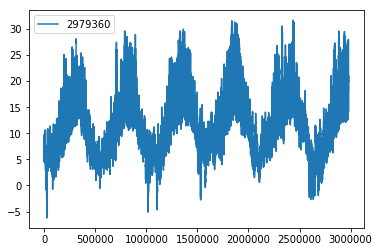

In [228]:
D1.plot()

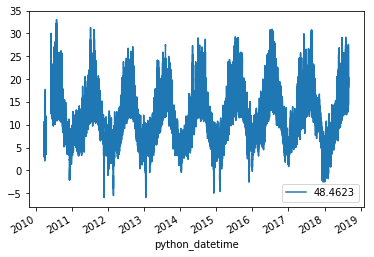

In [269]:
D2.plot(2, 1) # Plot the 2nd column with respect to the 3rd column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a94b9b358>]],
      dtype=object)

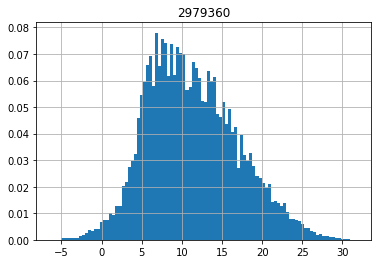

In [300]:
D1.hist(bins=100, density=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1aca8056a0>]],
      dtype=object)

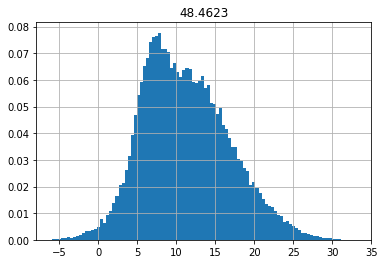

In [305]:
D2.hist(column='48.4623', bins=100, density=1)

/Users/Kev/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


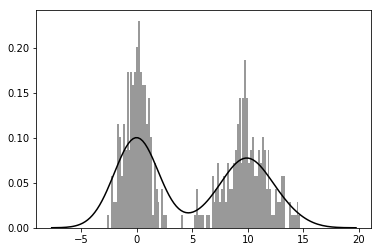

In [319]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sb.distplot(values, bins=100, color='k')

In [317]:
values

0       0.361401
1      -0.620034
2       1.887622
3      -1.089621
4      -0.109143
5       1.330826
6       2.764346
7       0.113867
8       1.826732
9       1.610335
10     -0.201451
11     -0.461650
12     -0.020269
13      1.444679
14     -0.237380
15     -0.836551
16      0.110625
17      1.631535
18     -0.232365
19     -0.170608
20      1.694013
21     -0.156241
22      0.764328
23     -0.241600
24     -0.364688
25      1.372599
26      0.335329
27      1.543018
28     -0.111059
29     -0.747575
         ...    
370    12.391656
371     8.621951
372     9.095599
373     9.391336
374     6.751616
375     6.498204
376     9.443734
377     8.547019
378    10.656487
379     9.418624
380     8.059726
381     9.227277
382     8.041223
383    13.114127
384     8.850006
385     9.124804
386     7.944993
387     7.376913
388     9.075734
389    10.959830
390     8.986578
391    10.886792
392     7.324700
393    10.419520
394    11.016597
395     9.464660
396     8.703489
397    12.4464

In [320]:
D1

,2979360
0,4.50
1,4.50
2,4.50
3,4.50
4,4.50
5,4.50
6,4.50
7,4.50
8,4.50
9,4.50
